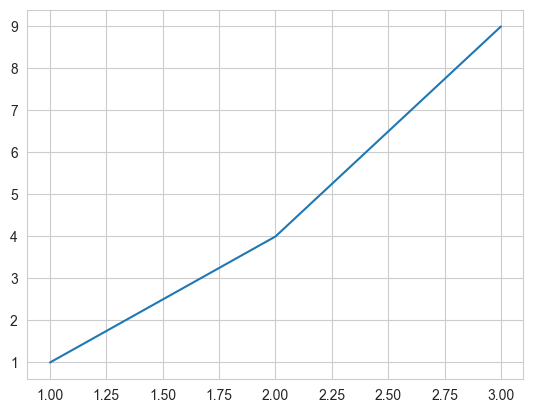

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()

In [2]:
import pytz
from datetime import datetime
from gym_mtsim import MtEnvAdvanced, MtSimulator, FOREX_DATA_PATH, Timeframe
from stable_baselines3 import A2C

In [3]:
train_sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=200.,
    stop_out_level=0.2,
    hedge=False,
)

train_sim.download_data(
    symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
    time_range=(
        datetime(2021, 6, 30, tzinfo=pytz.UTC),
        datetime(2023, 6, 30, tzinfo=pytz.UTC)
    ),
    timeframe=Timeframe.D1
)

valid_sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=200.,
    stop_out_level=0.2,
    hedge=False,
)

valid_sim.download_data(
    symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
    time_range=(
        datetime(2023, 1, 7, tzinfo=pytz.UTC),
        datetime(2023, 12, 31, tzinfo=pytz.UTC)
    ),
    timeframe=Timeframe.D1
)

In [4]:
train_env = MtEnvAdvanced(
    original_simulator=train_sim,
    trading_symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
    window_size=30,
    multiprocessing_processes=2
)

valid_env = MtEnvAdvanced(
    original_simulator=valid_sim,
    trading_symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
    window_size=30,
    multiprocessing_processes=2
)

hedging acttivated False
hedging acttivated False


In [5]:
print("train_env information:")

for symbol in train_env.prices:
    print(f"> prices[{symbol}].shape:", train_env.prices[symbol].shape)

print("> signal_features.shape:", train_env.signal_features.shape)
print("> features_shape:", train_env.features_shape)

train_env information:
> prices[EURUSD].shape: (523, 5)
> prices[GBPCAD].shape: (523, 5)
> prices[GBPUSD].shape: (523, 5)
> prices[USDCAD].shape: (523, 5)
> prices[USDCHF].shape: (523, 5)
> prices[GBPJPY].shape: (523, 5)
> prices[USDJPY].shape: (523, 5)
> signal_features.shape: (523, 637)
> features_shape: (30, 637)


In [6]:
print("valid_env information:")

for symbol in valid_env.prices:
    print(f"> prices[{symbol}].shape:", valid_env.prices[symbol].shape)

print("> signal_features.shape:", valid_env.signal_features.shape)
print("> features_shape:", valid_env.features_shape)

valid_env information:
> prices[EURUSD].shape: (254, 5)
> prices[GBPCAD].shape: (254, 5)
> prices[GBPUSD].shape: (254, 5)
> prices[USDCAD].shape: (254, 5)
> prices[USDCHF].shape: (254, 5)
> prices[GBPJPY].shape: (254, 5)
> prices[USDJPY].shape: (254, 5)
> signal_features.shape: (254, 637)
> features_shape: (30, 637)


volume to trade 71.93080844254459
volume to trade 89.42486654092505
volume to trade -77.11687332581
volume to trade -72.57723517849995
volume to trade -13.15218660747513
volume to trade -20.69494654711322
volume to trade -35.51066314397218
action: [ 71.93080844  89.42486654 -77.11687333 -72.57723518 -13.15218661
 -20.69494655 -35.51066314] reward: 0.0 done: False
volume to trade 93.10908650358124
volume to trade -63.80495434498441
volume to trade 46.39113180716893
volume to trade 46.376057323847476
volume to trade 18.19804206812185
volume to trade -25.11607299756038
volume to trade -16.505561434322672
action: [ 93.1090865  -63.80495434  46.39113181  46.37605732  18.19804207
 -25.116073   -16.50556143] reward: 938.5203722360566 done: False
volume to trade -88.25611364412889
volume to trade -1.131797063957677
volume to trade -63.16282902875845
volume to trade 55.9189338738301
volume to trade 4.2726693891710035
volume to trade 97.72509351383849
volume to trade -46.75184002379136
action: [

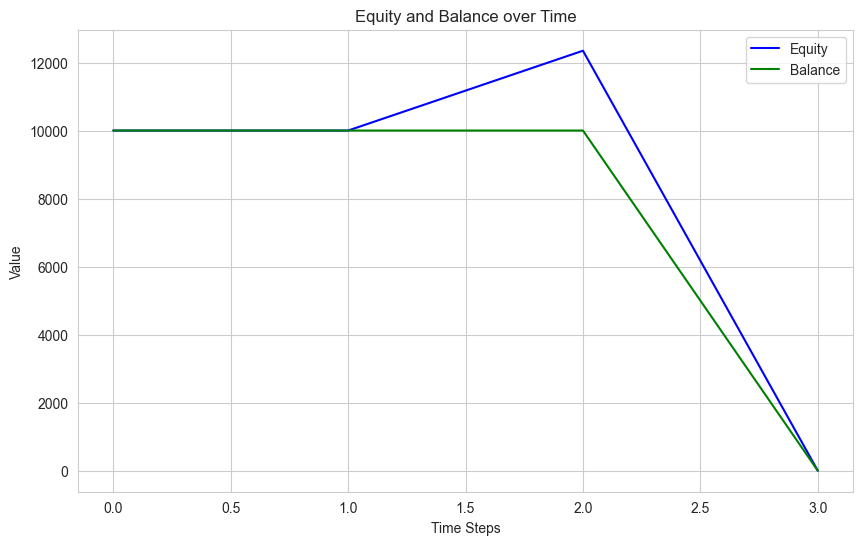

In [7]:
observation = train_env.reset()

while True:
    action = train_env.action_space.sample()
    observation, reward, done, _, info = train_env.step(action)
    print("action:", action, "reward:", reward, "done:", done)


    if done:
        print("Final Balance:", info['balance'][-1])
        train_env.render(mode='simple_figure')
        break

In [8]:
model = A2C('MultiInputPolicy', train_env, verbose=1)
observation = train_env.reset()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [9]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

In [10]:
check_env(train_env)

volume to trade -81.18374239883917
volume to trade 43.46977835524311
volume to trade -31.902227305541842
volume to trade -30.388076079626032
volume to trade 24.332589672215036
volume to trade 94.52280901976113
volume to trade -82.58635415240623
volume to trade -74.84209270930025
volume to trade 93.73665405847274
volume to trade -8.883230773158644
volume to trade -75.227451831027
volume to trade 65.42798374599377
volume to trade 22.19989212555207
volume to trade -3.8570775383268057
volume to trade 44.87581939020765
volume to trade -98.76373463397631
volume to trade -94.06003978440319
volume to trade 90.52246334610214
volume to trade 12.648137708326672
volume to trade -53.83805091185889
volume to trade 82.08134028080283
volume to trade -26.320799462972147
volume to trade -56.39555378119749
volume to trade 46.439280129422826
volume to trade 73.1126568559273
volume to trade -89.73880513210857
volume to trade 24.067996758647254
volume to trade -2.2240119843675643
volume to trade 88.28044221

C:\Users\stefa\anaconda3\envs\RL\Lib\site-packages\stable_baselines3\common\env_checker.py:251: UserWarning: Your observation features has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
C:\Users\stefa\anaconda3\envs\RL\Lib\site-packages\stable_baselines3\common\env_checker.py:441: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf. https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(
C:\Users\stefa\anaconda3\envs\RL\Lib\site-packages\stable_baselines3\common\env_checker.py:452: UserWarning: Your action space has dtype float64, we recommend using np.float32 to avoid cast errors.
  warnings.warn(


In [11]:
model.learn(total_timesteps=1000)
import time
train_vec_env = model.get_env()
observation = train_vec_env.reset()

while True:
    action, _states = model.predict(observation, deterministic=True)
    observation, reward, done, _, info = train_env.step(action)

    if done:
        print("Final Balance:", info['balance'][-1])
        train_env.render(mode='simple_figure')
        break

volume to trade -0.4488578140735626
volume to trade -1.7025150060653687
volume to trade 1.0013964176177979
volume to trade 0.08408764749765396
volume to trade -0.8707791566848755
volume to trade 0.3641665577888489
volume to trade -1.7493348121643066
volume to trade -1.120232343673706
volume to trade -0.25283917784690857
volume to trade -0.410119891166687
volume to trade 1.8614310455322265
volume to trade -0.9213337302207947
volume to trade -0.8026980912685394
volume to trade 1.4207484722137451
volume to trade 0.6463048458099365
volume to trade -1.2804381847381592
volume to trade -1.009357312694192
volume to trade -2.472377898693085
volume to trade -0.34780755639076233
volume to trade -0.6093553459644317
volume to trade -2.1499559116363525
volume to trade 0.21797076463699339
volume to trade -1.3703818321228027
volume to trade -2.8204057216644287
volume to trade -2.281492652893067
volume to trade -0.9223998188972473
volume to trade 1.1348378801345826
volume to trade -2.2953496408462524
v

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
valid_vec_env = A2C('MultiInputPolicy', valid_env, verbose=1).get_env()

observation = valid_vec_env.reset()
while True:
    action, _states = model.predict(observation, deterministic=True)
    observation, reward, done, _, info = valid_env.step(action)

    if done:
        print("Final Balance:", info['balance'][-1])
        valid_env.render(mode='simple_figure')
        break

In [ ]:
from IPython.display import clear_output


episodes = 1000
timesteps = valid_env.signal_features.shape[0]
valid_balance = []


for episode in range(episodes):
    # delete the cell output
    clear_output(wait=True)
    
    model.learn(total_timesteps=timesteps)
    
    observation = train_vec_env.reset()
    while True:
        action, _states = model.predict(observation, deterministic=True)
        observation, reward, done, _, info = train_env.step(action)

        if done:
            print("Final Balance train_env:", info['balance'][-1])
            train_env.render(mode='simple_figure')
            break
            
    observation = valid_vec_env.reset()
    while True:
        action, _states = model.predict(observation, deterministic=True)
        observation, reward, done, _, info = valid_env.step(action)

        if done:
            print("Final Balance valid_env:", info['balance'][-1])
            valid_balance.append(info['balance'][-1])
            valid_env.render(mode='simple_figure')
            break
            
    # save the model if it is the best so far
    if valid_balance[-1] == max(valid_balance):
        model.save('best_model')

model = A2C.load('best_model')